https://ipython.readthedocs.io/en/stable/api/generated/IPython.core.interactiveshell.html

In [3]:
import io
import IPython
from IPython.core.interactiveshell import InteractiveShell

In [ ]:
import base64
from PIL import Image
import numpy as np
from io import BytesIO
from IPython.utils.capture import RichOutput
def richoutput_to_image(output):
    try:
        assert isinstance(output, RichOutput)
        # assert output.data['image/png']
        if "image/png" in output.data:
            image_data = output.data['image/png']
            image_data = base64.b64decode(image_data)
            image = Image.open(BytesIO(image_data))
            return image
        elif "text/html" in output.data:
            html = output.data['text/html']
            return html
        elif "text/plain" in output.data:
            # note mostly text/plain and text/html co exist. not one or the other. 
            text = output.data['text/plain']
            return text
    except AssertionError and KeyError:
        return None

In [4]:
def ipyshell_code_exec(shell, code, verbose=False):
    with IPython.utils.io.capture_output() as captured:
        # Execute the code
        out = shell.run_cell(code)
    if verbose:
        print("Result of the code execution: ", type(out.result), "\n", out.result)
        print("Standard Output:", captured.stdout)
        print("Standard Error:", captured.stderr)
        print("Captured Outputs:", captured.outputs)
    disp_images = []
    if captured.outputs:
        for display_output in captured.outputs:
            # Process each display output as needed
            disp_images.append(richoutput_to_image(display_output))
    # note stdout returns a string
    # out.result returns real objects like tensors! important!
    return out, captured, disp_images


def ipyshell_get_var(shell, var_name):
    return shell.user_ns[var_name]

In [21]:
shell = InteractiveShell.instance()

In [27]:
code = """
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
df
"""
out, captured, disp_images = ipyshell_code_exec(shell, code, verbose=True)
# captured.show()

Result of the code execution:  <class 'NoneType'> 
 None
Standard Output: 
Standard Error: 
Captured Outputs: [<IPython.utils.capture.RichOutput object at 0x147141e90>]


In [ ]:
ipyshell_get_var(shell, 'df')

,A,B,C,D
0,0.663396,0.547157,-0.514295,0.732124
1,1.777584,-1.233883,0.934941,0.476842
2,-0.270366,-1.093148,-0.288930,0.008554
3,-0.271550,1.253009,-1.788234,-0.297547
4,-0.616244,1.645461,1.653422,0.356918
5,-0.311488,0.483580,-1.343989,-0.076683
6,-0.571415,-0.416898,0.187642,-1.391262
7,-1.091776,0.325290,-1.459464,1.350037
8,0.481904,1.225405,0.945122,-1.949367
9,1.309722,2.002369,0.935231,0.447071


In [ ]:
ipyshell_get_var(shell, 'x')

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [ ]:
code = """
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
torch.manual_seed(0)
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet18

model = resnet18(pretrained=True)
model
"""
out, captured, disp_images = ipyshell_code_exec(shell, code, verbose=True)

Result of the code execution:  <class 'torchvision.models.resnet.ResNet'> 
 ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

In [ ]:
code = """
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
df
"""
ipyshell_code_exec(shell, code, verbose=False)

In [ ]:

# Code to be executed
code = """
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
df
"""

# Capture the output of the code execution
# output = io.StringIO()
# error = io.StringIO()

with IPython.utils.io.capture_output() as captured:
    # Execute the code
    out = shell.run_cell(code)

# captured.stdout contains the standard output
# captured.stderr contains the standard error
# captured.outputs contains display outputs (like from plt.show())

print("Result of the code execution: ", out.result)
print("Standard Output:", captured.stdout)
print("Standard Error:", captured.stderr)
print("Rich Outputs:", captured.outputs)
# For plots or other rich display outputs:
if captured.outputs:
    for display_output in captured.outputs:
        # Process each display output as needed
        # For example, display_output.data could contain a plot's image data
        pass

NameError: name 'IPython' is not defined

In [33]:

# Create an instance of the IPython kernel
shell = InteractiveShell()

# Code to be executed
code = """
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()
"""
# note the show command will really send the output to the output.

# Capture the output of the code execution
output = io.StringIO()
error = io.StringIO()

with IPython.utils.io.capture_output() as captured:
    # Execute the code
    out = shell.run_cell(code)

# captured.stdout contains the standard output
# captured.stderr contains the standard error
# captured.outputs contains display outputs (like from plt.show())

print("Result of the code execution: ", out.result)
print("Standard Output:", captured.stdout)
print("Standard Error:", captured.stderr)

# For plots or other rich display outputs:
if captured.outputs:
    for display_output in captured.outputs:
        # Process each display output as needed
        # For example, display_output.data could contain a plot's image data
        pass

Result of the code execution:  None
Standard Output: 
Standard Error: 


In [31]:
out.result

In [27]:
type(captured.outputs[0])

IPython.utils.capture.RichOutput

In [14]:
captured.outputs[0].data['image/png']

'iVBORw0KGgoAAAANSUhEUgAAAjgAAAGdCAYAAAAfTAk2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAABkQklEQVR4nO3deXhTZdo/8G+WJuma7hstFFqglKVAkVp2pVKUUXEbmQFRRHhHZUbEcWFexRkdZVzG34wOIyPKoO+4jaM4iIpg2aG0WCxrCxQoXdO9TZu2SZOc3x9pApUWWmh6kpPv57pycZGcnNxJ25P72e5HJgiCACIiIiIJkYsdABEREVFfY4JDREREksMEh4iIiCSHCQ4RERFJDhMcIiIikhwmOERERCQ5THCIiIhIcpjgEBERkeQoxQ5ADFarFeXl5fD394dMJhM7HCIiIuoBQRDQ1NSE6OhoyOWX76PxyASnvLwcsbGxYodBREREV6GkpAQxMTGXPcYjExx/f38Atg8oICBA5GiIiIioJ/R6PWJjYx3f45fjkQmOfVgqICCACQ4REZGb6cn0Ek4yJiIiIslhgkNERESSwwSHiIiIJIcJDhEREUkOExwiIiKSHCY4REREJDlMcIiIiEhymOAQERGR5DDBISIiIslxaoKze/du3HrrrYiOjoZMJsOXX355xefs3LkT48ePh1qtRkJCAjZs2HDJMWvWrEFcXBw0Gg1SU1ORk5PT98ETERGR23JqgmMwGJCcnIw1a9b06Phz585hzpw5uOGGG5CXl4fly5fjoYcewnfffec45tNPP8WKFSvw/PPP49ChQ0hOTkZGRgaqqqqc9TaIiIjIzcgEQRD65YVkMmzcuBFz587t9pinn34aX3/9NY4dO+a4b968eWhoaMCWLVsAAKmpqbjuuuvwt7/9DQBgtVoRGxuLX//613jmmWd6FIter4dWq0VjYyP3oiIiInITvfn+dqnNNrOyspCent7pvoyMDCx

In [17]:
import base64
from PIL import Image
import numpy as np
from io import BytesIO
image_data_base64 = captured.outputs[0].data['image/png']
# Decode the base64 image data
image_data = base64.b64decode(image_data_base64)
# Open the image with Pillow
image = Image.open(BytesIO(image_data))
# Convert the image to a NumPy array
image_array = np.array(image)
# image

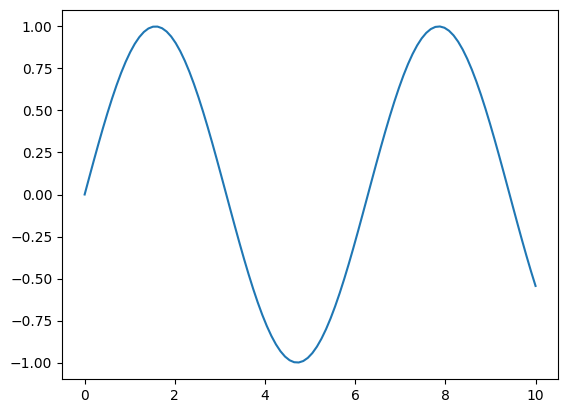

In [22]:
image.convert('RGB')

In [44]:

# Code to be executed
code = """
import matplotlib.pyplot as plt
import numpy as np
import torch

torch.manual_seed(0)
x_th = torch.linspace(0, 10, 100)
x_th
"""

# Capture the output of the code execution
# output = io.StringIO()
# error = io.StringIO()

with IPython.utils.io.capture_output() as captured:
    # Execute the code
    out = shell.run_cell(code)

# captured.stdout contains the standard output
# captured.stderr contains the standard error
# captured.outputs contains display outputs (like from plt.show())

print("Result of the code execution: ", out.result)
print("Standard Output:", captured.stdout)
print("Standard Error:", captured.stderr)
print("Captured Outputs:", captured.outputs)
# For plots or other rich display outputs:
disp_images = []
if captured.outputs:
    for display_output in captured.outputs:
        # Process each display output as needed
        # For example, display_output.data could contain a plot's image data
        disp_images.append(richoutput_to_image(display_output))

Result of the code execution:  tensor([ 0.0000,  0.1010,  0.2020,  0.3030,  0.4040,  0.5051,  0.6061,  0.7071,
         0.8081,  0.9091,  1.0101,  1.1111,  1.2121,  1.3131,  1.4141,  1.5152,
         1.6162,  1.7172,  1.8182,  1.9192,  2.0202,  2.1212,  2.2222,  2.3232,
         2.4242,  2.5253,  2.6263,  2.7273,  2.8283,  2.9293,  3.0303,  3.1313,
         3.2323,  3.3333,  3.4343,  3.5354,  3.6364,  3.7374,  3.8384,  3.9394,
         4.0404,  4.1414,  4.2424,  4.3434,  4.4444,  4.5455,  4.6465,  4.7475,
         4.8485,  4.9495,  5.0505,  5.1515,  5.2525,  5.3535,  5.4545,  5.5556,
         5.6566,  5.7576,  5.8586,  5.9596,  6.0606,  6.1616,  6.2626,  6.3636,
         6.4646,  6.5657,  6.6667,  6.7677,  6.8687,  6.9697,  7.0707,  7.1717,
         7.2727,  7.3737,  7.4747,  7.5758,  7.6768,  7.7778,  7.8788,  7.9798,
         8.0808,  8.1818,  8.2828,  8.3838,  8.4848,  8.5859,  8.6869,  8.7879,
         8.8889,  8.9899,  9.0909,  9.1919,  9.2929,  9.3939,  9.4949,  9.5960,
         

In [41]:
captured.outputs

[]

In [39]:
type(out.result)

pandas.core.frame.DataFrame

In [ ]:
shell2 = InteractiveShell()

In [5]:
shell2.user_ns

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': [''],
 '_oh': {},
 '_dh': [PosixPath('/Users/binxuwang/Github/openai-gpt-playground')],
 'In': [''],
 'Out': {},
 'get_ipython': <bound method InteractiveShell.get_ipython of <IPython.core.interactiveshell.InteractiveShell object at 0x10c1bc1d0>>,
 'exit': <IPython.core.autocall.ExitAutocall at 0x11b1b7690>,
 'quit': <IPython.core.autocall.ExitAutocall at 0x11b1b7690>,
 'open': <function io.open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)>,
 '_': '',
 '__': '',
 '___': ''}

In [3]:
captured.outputs

[]

In [6]:
shell.user_ns

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': [''],
 '_oh': {1: [<matplotlib.lines.Line2D at 0x11b15fa50>]},
 '_dh': [PosixPath('/Users/binxuwang/Github/openai-gpt-playground')],
 'In': [''],
 'Out': {1: [<matplotlib.lines.Line2D at 0x11b15fa50>]},
 'get_ipython': <bound method InteractiveShell.get_ipython of <IPython.core.interactiveshell.InteractiveShell object at 0x10c199a50>>,
 'exit': <IPython.core.autocall.ExitAutocall at 0x10c19f490>,
 'quit': <IPython.core.autocall.ExitAutocall at 0x10c19f490>,
 'open': <function io.open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)>,
 '_': [<matplotlib.lines.Line2D at 0x11b15fa50>],
 '__': '',
 '___': '',
 'plt': <module 'matplotlib.pyplot' from '/Users/binxuwang/minifo

In [7]:
shell.user_global_ns

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': [''],
 '_oh': {1: [<matplotlib.lines.Line2D at 0x11b15fa50>]},
 '_dh': [PosixPath('/Users/binxuwang/Github/openai-gpt-playground')],
 'In': [''],
 'Out': {1: [<matplotlib.lines.Line2D at 0x11b15fa50>]},
 'get_ipython': <bound method InteractiveShell.get_ipython of <IPython.core.interactiveshell.InteractiveShell object at 0x10c199a50>>,
 'exit': <IPython.core.autocall.ExitAutocall at 0x10c19f490>,
 'quit': <IPython.core.autocall.ExitAutocall at 0x10c19f490>,
 'open': <function io.open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)>,
 '_': [<matplotlib.lines.Line2D at 0x11b15fa50>],
 '__': '',
 '___': '',
 'plt': <module 'matplotlib.pyplot' from '/Users/binxuwang/minifo

In [17]:
shell.get_local_scope(2)

{'self': <ipykernel.zmqshell.ZMQInteractiveShell at 0x1059da110>,
 'nodelist': [<ast.Expr at 0x10f439150>],
 'cell_name': '/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_3898/2924406766.py',
 'interactivity': 'last',
 'compiler': <ipykernel.compiler.XCachingCompiler at 0x104cc0f50>,
 'result': <ExecutionResult object at 13a29dbd0, execution_count=17 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 13a258ad0, raw_cell="shell.get_local_scope(2)" store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:Untitled-1.ipynb?jupyter-notebook#X10sdW50aXRsZWQ%3D> result=None>,
 '_async': False,
 'to_run_exec': [],
 'to_run_interactive': [<ast.Expr at 0x10f439150>],
 'compare': <function IPython.core.interactiveshell.InteractiveShell.run_ast_nodes.<locals>.compare(code)>,
 'to_run': [(<ast.Expr at 0x10f439150>, 'single')],
 'node': <ast.Expr at 0x10f439150>,
 'mode': 'single',
 'mod': <ast.Interactive at 0x10f438f70>,
 'code': <code object 

In [19]:
shell.user_ns['x']

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [14]:
out.result

In [8]:
captured.outputs

[]